In [56]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob as gl
sys.path.append('/home/matt/readout/host/')
import ali_offline_demod as dm
from scipy import signal
import scipy
import imp
imp.reload(dm)


<module 'ali_offline_demod' from '/home/matt/readout/host/ali_offline_demod.py'>

In [57]:
def get_mean_current(bias_info,times,data):
    """
    get the mean of Ites for all channels based on bias values and times
    time is unix time
    data is the output dm.demodulate, in unit of phi0 numbers
    """
    data_bin=np.zeros((data.shape[0],bias_info.shape[0]))
    print (data_bin.shape)
    for j in range(data.shape[0]):
        data_ch=data[j]
        for i in range(bias_info.shape[0]):
            bs_time=bias_info[i,0]
            chunck=data_ch[np.where((times>bs_time+0.4)&(times<bs_time+1.6))]
            data_bin[j,i]=np.mean(chunck)
    data_bin=np.apply_along_axis(unwrap_change_current_per_chan, 1, data_bin)       
    return data_bin
        
def unwrap_change_current_per_chan(data_ch):
    data_ch_unwrap=np.unwrap(data_ch,discont=0.48,period=1)
    data_ch_uA=data_ch_unwrap*9
    return data_ch_uA
    
        
def get_mean_current_nounwrap(bias_info,times,data):
    """
    get the mean of Ites for all channels based on bias values and times, then unwrap and transfer to physics unit pA
    time is unix time
    data is the output dm.demodulate, in unit of phi0 numbers
    """
    data_bin=np.zeros((data.shape[0],bias_info.shape[0]))
    print (data_bin.shape)
    for j in range(data.shape[0]):
        data_ch=data[j]
        for i in range(bias_info.shape[0]):
            bs_time=bias_info[i,0]
            chunck=data_ch[np.where((times>bs_time+0.4)&(times<bs_time+1.6))]
            data_bin[j,i]=np.mean(chunck)
    data_bin*=9      
    return data_bin       
        
    
    
    

In [67]:
"""
path='/Users/yaqiongli/Documents/ali_code/stanford_testing/2024-02-01_new_IV_curve_procedure/'
initial_lo_sweep=np.load(path+'fcenter_4250.0_20240201153055/lo_sweep_initial_fcenter_4250.0_20240201153102.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(path+'fcenter_4250.0_20240201153055/lo_sweep_targeted_2_fcenter_4250.0_20240201153350.npy')#find targeted sweep file
tone_freqs=np.load(path+'fcenter_4250.0_20240201153055/freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240201153232.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(path+'toneinit_fcenter_4250.0_20240201153055_t_20240201160747/ts_toneinit_fcenter_4250.0_20240201153055_t_20240201160808.hd5') #find time stream data
Ibias=np.loadtxt(path+'toneinit_fcenter_4250.0_20240201153055_t_20240201160747/bias_data_20240201160810.txt')
"""
"""
initial_lo_sweep=np.load('/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240201153055/lo_sweep_initial_fcenter_4250.0_20240201153102.npy') #find initial lo sweep file
targeted_lo_sweep=np.load('/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240201153055/lo_sweep_targeted_2_fcenter_4250.0_20240201153350.npy') #find targeted sweep file
tone_freqs=np.load('/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240201153055/freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240201153232.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data('/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240201153055_t_20240201160747/ts_toneinit_fcenter_4250.0_20240201153055_t_20240201160808.hd5')
Ibias=np.loadtxt('/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240201153055_t_20240201160747/bias_data_20240201160810.txt')
"""

"""
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202104043/'
tspath = '/home/matt/alicpt_data/time_streams/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202104050.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202104318.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202104204.npy') #find tone freqs
#ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202104529.hd5') #8.2 mA
#ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202105743.hd5') #8.5 mA
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202105838.hd5') #8.0 mA
#Ibias=np.loadtxt()
"""

""" current IV
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202104043/'
tspath = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240202104043_t_20240202112027/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202104050.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202104318.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202104204.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202112204.hd5') #8.0 mA
Ibias=np.loadtxt(tspath+'bias_data_20240202112206.txt')
"""

"""
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202104043/'
tspath = '/home/matt/alicpt_data/time_streams/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202104050.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202104318.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202104204.npy') #find tone freqs
#ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202114335.hd5') #8.0 mA
#ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202115243.hd5')
#ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202122806.hd5') #no chop 5.5
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202122854.hd5') #no chop 7

#Ibias=np.loadtxt(tspath+'bias_data_20240202112206.txt')


#With Plate
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202151540/'
tspath = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240202151540_t_20240202152008/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202151548.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202151816.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202151703.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202151540_t_20240202152139.hd5') #no chop 7
Ibias=np.loadtxt(tspath+'bias_data_20240202152141.txt')
"""

"""
#Without Plate
no_initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202104043/'
no_tspath = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240202104043_t_20240202145656/'

no_initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202104050.npy') #find initial lo sweep file
no_targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202104318.npy') #find targeted sweep file
no_tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202104204.npy') #find tone freqs
no_ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202104043_t_20240202145738.hd5') #no chop 7
no_Ibias=np.loadtxt(tspath+'bias_data_20240202145740.txt')
"""

"""
#with Al blanking
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202151540/'
tspath = '/home/matt/alicpt_data/IV_data/toneinit_fcenter_4250.0_20240202151540_t_20240202155930/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202151548.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202151816.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202151703.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202151540_t_20240202155946.hd5') #no chop 7
Ibias=np.loadtxt(tspath+'bias_data_20240202155948.txt')
"""


#taking small plate on and off
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202151540/'
tspath = '/home/matt/alicpt_data/time_streams/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202151548.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202151816.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202151703.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202151540_t_20240202164035.hd5') #no chop 7

"""
initpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202151540/'
tspath = '/home/matt/alicpt_data/time_streams/'

initial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202151548.npy') #find initial lo sweep file
targeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202151816.npy') #find targeted sweep file
tone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202151703.npy') #find tone freqs
ts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202151540_t_20240202174221.hd5') #no chop 7
"""

"\ninitpath = '/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240202151540/'\ntspath = '/home/matt/alicpt_data/time_streams/'\n\ninitial_lo_sweep=np.load(initpath+'lo_sweep_initial_fcenter_4250.0_20240202151548.npy') #find initial lo sweep file\ntargeted_lo_sweep=np.load(initpath+'lo_sweep_targeted_2_fcenter_4250.0_20240202151816.npy') #find targeted sweep file\ntone_freqs=np.load(initpath+'freq_list_lo_sweep_targeted_1_fcenter_4250.0_20240202151703.npy') #find tone freqs\nts_fr,Is_fr,Qs_fr=dm.read_data(tspath+'ts_toneinit_fcenter_4250.0_20240202151540_t_20240202174221.hd5') #no chop 7\n"

In [24]:
print(len(tone_freqs))

233


In [55]:
%matplotlib qt
channel1 = 10
channel2 = 10
#plt.plot(ts_fr-ts_fr[0],Is_fr[channel1],c='b',alpha=0.3)
#plt.plot(ts_fr-ts_fr[0],Qs_fr[channel1],c='r',alpha=0.3)
plt.plot(ts_fr-ts_fr[0], np.arctan(Qs_fr[channel1]/Is_fr[channel]),alpha=0.3)

#plt.plot(ts_fr-ts_fr[0],Is_fr[channel2]-np.mean(Is_fr[channel2]),c='g',alpha=0.3)
#plt.plot(ts_fr-ts_fr[0],Qs_fr[channel2]-np.mean(Qs_fr[channel2]),alpha=0.3)
#plt.plot(ts_fr-ts_fr[0], np.arctan(Qs_fr[channel2]/Is_fr[channel]),alpha=0.3)

plt.ylabel('I [DAC]')
plt.xlabel('Time [s]')
plt.show()

#-np.mean(Is_fr[channel1])
#-np.mean(Qs_fr[channel1])


##### 1) View Initial LO Sweep

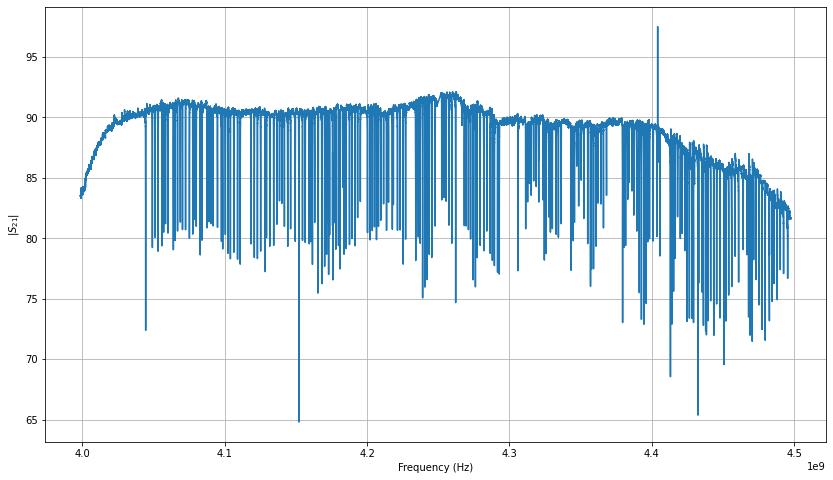

In [59]:
%matplotlib inline
dm.plot_s21([initial_lo_sweep])




## 2) Enter Frequency Region for Cable Delay Calculation

In [60]:
delay_region_start = 4.01e9  #Hz
delay_region_stop =  4.03e9 #Hz


## 3) Measure Cable Delay

2.9378125720221163e-08


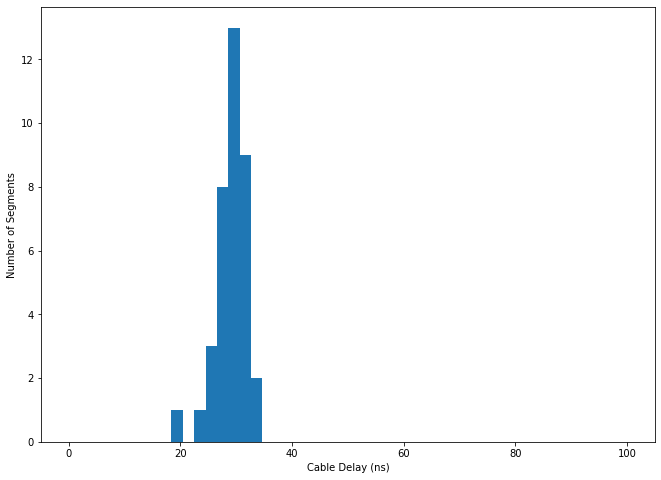

In [61]:
# Measure
%matplotlib inline
delays = dm.measure_delay_test_given_freq(initial_lo_sweep,delay_region_start,delay_region_stop,plot=True)
print (np.median(delays))



## 4) Remove Cable Delay

In [68]:
#remove cable delay from target sweep and timestream
#plot S21 phase -> when there is no resonance it is the cable delay
targeted_lo_sweep_rm=dm.remove_delay(targeted_lo_sweep,np.median(delays))
IQ_stream_rm=dm.remove_delay_timestream(Is_fr+1j*Qs_fr,tone_freqs,np.median(delays))



## 5) Measure Circle Parameters (per channel)

In [69]:
#Jiansong Gao Thesis Method
calibration=dm.measure_circle_allch(targeted_lo_sweep_rm,tone_freqs) #finds circle center and initial phase for every channel

## 6) Calibrate Time Stream Data (per channel)

In [70]:


data_cal=dm.get_phase(IQ_stream_rm,calibration)




## 7) View Time Stream Data (per channel)

In [71]:
%matplotlib qt 
dm.plot_timestream(ts_fr, data_cal, start_time = 0, end_time = 20, channel_nums = [20])



## 8) Find nphi_0

In [72]:
%matplotlib qt
t_start=20
t_stop=30
f_sawtooth = 5 #Hz

n_phi0 = dm.find_n_phi0(ts_fr[488*t_start:488*t_stop],data_cal[:,488*t_start:488*t_stop],f_sawtooth,plot=True)  #discard the first few seconds

print(f'n_phi0 = {n_phi0}')

n_phi0 = 3.3718912856916035


## 9) Find t0 (beginning of first flux ramp)

In [73]:
%matplotlib qt
t0_array = np.array([])
for current_channel in range(len(data_cal)):
    t0 = dm.mea_reset_t0(ts_fr[488*t_start:488*t_stop],data_cal[current_channel,488*t_start:488*t_stop],f_sawtooth,plot=True)
    t0_array = np.append(t0_array,t0)
    
t0_med = np.nanmedian(t0_array)
#print(t0_array)
print(t0_med)

0.157795190811157


## 9) Demodulate and View Results 

In [74]:
t_demods=[]
data_demods=[]
start_idx = dm.find_nearest_idx(ts_fr-ts_fr[0], t0_med)
for chan in range(data_cal.shape[0]):#np.arange(225,230,1):#range(data_cal.shape[0]):
    t_demod, data_demod = dm.demodulate(ts_fr[start_idx:]-ts_fr[start_idx], data_cal[chan, start_idx:], n_phi0, f_sawtooth, plot = True, plot_len = None)
    t_demods.append(t_demod)
    data_demod_unwrap=np.unwrap(data_demod,period=1)
    data_demods.append(data_demod_unwrap)
    
data_demods=np.vstack(data_demods)
t_demods=np.vstack(t_demods)

print(data_demods)

fig, ax = plt.subplots(1)
for chan in range(data_demods.shape[0]):
    ax.plot(t_demods[1], data_demods[chan])

[[ 0.14868608  0.16973871  0.15667779 ...  0.14864863  0.18343347
   0.1725883 ]
 [-0.26036337 -0.2387299  -0.24712956 ... -0.2752884  -0.25436075
  -0.26347014]
 [ 0.10614361  0.12880778  0.12044601 ...  0.09072841  0.11264234
   0.10190683]
 ...
 [-0.0613327  -0.04017394 -0.04705971 ... -0.0930907  -0.0720733
  -0.07925732]
 [-0.3211826  -0.30120234 -0.38310127 ... -0.34122867 -0.3254635
  -0.32204642]
 [ 0.09936003  0.12267182  0.11042755 ...  0.07636035  0.09700989
   0.09156651]]


In [384]:
data_demods_bin = get_mean_current(Ibias,t_demod+ts_fr[start_idx],data_demods)

(233, 188)


In [276]:
path = '/home/matt/readout/jupyter_notebooks/'
"""
np.savetxt(path+'toneinit_fcenter_4250.0_20240201153055_t_20240201160747/demod.txt',data_demods)
np.savetxt(path+'toneinit_fcenter_4250.0_20240201153055_t_20240201160747/t_demod.txt',t_demods+ts_fr[start_idx])
"""

np.savetxt(path+'demod.txt',data_demods)
np.savetxt(path+'t_demod.txt',t_demods+ts_fr[start_idx])


In [27]:
plt.plot(range(temp.shape[0]),temp*0.01, label='original',alpha=0.5)
plt.plot(range(d_temp.shape[0]),d_temp,label='d',alpha=0.5)
plt.plot(range(dd_temp.shape[0]),dd_temp,label='dd',alpha=0.5)
plt.legend()

In [32]:
d_smooth=np.diff(temp_smooth)
dd_smooth=np.diff(d_smooth)

In [33]:
plt.plot(t_smooth,temp_smooth*0.01, alpha=0.5)
plt.plot(t_smooth[:-1],d_smooth, alpha=0.5,label='d')
plt.plot(t_smooth[:-2],dd_smooth, alpha=0.5,label='dd')
plt.legend()
plt.show()

In [34]:
def get_change_idx(data,type):
    d=np.diff(data)
    dd=np.diff(d)
    idx=0
    if type=='sc':
        idx=np.argmin(dd)
    if type=='normal':
        idx=np.argmax(dd)
    return idx

In [35]:
idx_sc=get_change_idx(temp_smooth,'sc')
idx_nb=get_change_idx(temp_smooth,'normal')

In [197]:
plt.plot(t_smooth,temp_smooth, alpha=0.5)
plt.plot(t_smooth[:-1],d_smooth, alpha=0.5,label='d')
plt.plot(t_smooth[:-2],dd_smooth, alpha=0.5,label='dd')
plt.vlines(t_smooth[idx_sc+1],-300,0)
plt.vlines(t_smooth[idx_nb+1],-300,0)
plt.legend()

In [37]:
def IV_analysis_ch(times,bias_currents,resps,Rsh=0.4):
    """
    Input:
    times in unix
    bias_currents in mA
    resp in uA for one channel
    all three inputs have save dimension
    Outputs:
    dataframe containing timestream of Ites,Rtes,Vtes,Rn_almn,Rn_al
    """
    #Smooth resps due to jumps
    resps_smooth=smooth(resps,3)
    t_smooth=smooth(times,3)
    d_smooth=np.diff(resps_smooth)
    dd_smooth=np.diff(d_smooth)
    #Get superconducting and normal point
    idx_sc=get_change_idx(temp_smooth,'sc')+1
    idx_nb=get_change_idx(temp_smooth,'normal')+1
    t_sc=t_smooth[idx_sc]
    t_nb=t_smooth[idx_nb]
    idx_sc_org=dm.find_nearest_idx(times,t_sc)
    idx_nb_org=dm.find_nearest_idx(times,t_nb) #might want to add an extra step since this is binning 30s of data..
    resps_sc=resps[idx_sc_org+10:]
    resps_nb=resps[2:idx_nb_org-10]
    plt.plot(times,resps)
    plt.vlines(times[idx_sc_org],-300,0)
    plt.vlines(times[idx_nb_org],-300,0)
    bias_sc=bias_currents[idx_sc_org+10:]
    
    bias_nb=bias_currents[2:idx_nb_org-10]
    print (bias_sc.shape)
    print (bias_nb.shape)
    r_ratio_almn, shift = np.polyfit(bias_sc, resps_sc, 1)
    Rn_almn=Rsh*1e3/r_ratio_almn-Rsh
    print('almn normal resistance',Rn_almn)
    r_ratio_al,shift_2 = np.polyfit(bias_nb, resps_nb, 1)
    print (r_ratio_al,shift_2)
    Rn_al=Rsh*1e3/r_ratio_al-Rsh
    print (Rn_almn)
    print (Rn_al)
    Ites=resps-shift #uA
    Ishunt=bias_currents-Ites*1e-3 #mA
    Vshunt=Ishunt*1e-3*Rsh*1e-3 #V
    Rtes=Vshunt/(Ites*1e-6)-Rn_almn*1e-3 #Ohm
    Vtes=Rtes*Ites#uV
    #plt.plot(Vtes,Ites)
    
    
    
    
    
    
    
    
    

In [38]:
temp=data_demods_bin[139]
peak_sc,_=signal.find_peaks(0-temp,width=20)

In [196]:
plt.plot(range(temp.shape[0]),temp)
plt.vlines(peak_sc,-300,100)

In [315]:
def IV_analysis_ch_new(bias_currents,resps,Rsh=0.4,plot='IV'):
    """
    This method completely abandon the part that Ites might vary larger than 0.5 phi0 given the step limit of the Ibias
    i.e. it only cares about the Al normal state and part of Al transition state
    it assumes Rn_almn is 7.25mohm
    Outputs:
    dataframe containing timestream of Ites,Rtes,Vtes,Rn_almn,Rn_al
    """
    #only getting Al TES normal point
    Rn_almn=7.25
    peaks_nb,_=signal.find_peaks(0-resps,width=20)
    if len(peaks_nb)==0:
        return
    peak_nb=peaks_nb[0]
    resps_nb=resps[2:int(peak_nb-10)]
    bias_nb=bias_currents[2:peak_nb-10]
    r_ratio_al,shift = np.polyfit(bias_nb, resps_nb, 1)
    Rn_al=Rsh/r_ratio_al-Rsh*1e-3-Rn_almn*1e-3  #Ohm
    #print ('normal resistance for al TES',Rn_al)
    Ites=resps-shift #uA
    Ishunt=bias_currents*1e-3-Ites*1e-6 #A
    Vshunt=Ishunt*Rsh*1e-3 #V
    Rtes=Vshunt/(Ites*1e-6)-Rn_almn*1e-3 #Ohm
    bps=Rtes/Rn_al
    Vtes=Rtes*Ites#uV
    if Rn_al>0.05 or Rn_al<0.005: return
    if plot=='IV':
        plt.gcf().subplots_adjust(bottom=0.2)
        plt.gcf().subplots_adjust(left=0.2)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.plot(Vtes,Ites,alpha=0.8)
        plt.xlabel('$V_{tes}$ (μV)',fontsize=18)
        plt.ylabel('$I_{tes}$ (μA)',fontsize=18)
    if plot=='bp':
        plt.gcf().subplots_adjust(bottom=0.2)
        plt.gcf().subplots_adjust(left=0.2)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.plot(bias_currents,bps*100,alpha=0.3)
        plt.ylim(0,1.2*100)
        plt.ylabel('$\%R_n$',fontsize=18)
        plt.xlabel(r'$I_{bias}$',fontsize=18)
    return Rn_al,Rtes,Vtes,Ites,bps

In [316]:
for ch in range(data_demods_bin.shape[0]):
    try:
        IV_analysis_ch_new(Ibias[:,1],data_demods_bin[ch],plot='bp')
    except:
        continue

In [193]:
def get_Ibias_bp(bias_currents,resps,bp):
    #get Ibias when giving bias point
    Rn_al,Rtes,Vtes,Ites,bps=IV_analysis_ch_new(bias_currents,resps,Rsh=0.4,plot=None)
    if Rn_al>0.05 or Rn_al<0.005:
        return 
    else:
        turn_point,_= signal.find_peaks(0-bps,width=10)
        print ('turn_point',turn_point[-1])
        #print ('turning point'+turn_point[-1])
        Ibias_low=bias_currents[turn_point[-1]]
        bps_sel=bps[np.where(bias_currents>Ibias_low)]
        bias_currents_sel=bias_currents[np.where(bias_currents>Ibias_low)]
        idx=dm.find_nearest_idx(bps_sel,bp)
        print (idx)
        Ibias_bp = bias_currents_sel[idx]
        print (Ibias_bp)
        plt.gcf().subplots_adjust(bottom=0.2)
        plt.gcf().subplots_adjust(left=0.2)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.plot(bias_currents,bps*100)
        plt.vlines(Ibias_bp,0,120)
        plt.xlabel('$I_{bias}$ (mA)',fontsize=18)
        plt.ylabel('$\%(R_n)$',fontsize=18)
        plt.ylim(0,120)
        return Ibias_bp

In [387]:
#get_Ibias_bp(Ibias[:,1],data_demods_bin[139],0.5)

computed_bias_pt = np.array([])
for ch in range(data_demods_bin.shape[0]):
    try:
        computed_bias_pt = np.append(computed_bias_pt, get_Ibias_bp(Ibias[:,1],data_demods_bin[ch],0.5))
    except:
        continue
        
median_bp = np.median(computed_bias_pt)
print(median_bp)

turn_point 137
108
6.402499999999999
turn_point 129
107
6.476300048000001
turn_point 128
107
6.476300048000001
turn_point 123
113
5.9911999520000006
turn_point 124
109
6.315900024
turn_point 122
109
6.315900024
turn_point 126
111
6.152700072000002
turn_point 125
109
6.315900024
turn_point 122
109
6.315900024
turn_point 125
109
6.315900024
turn_point 135
126
4.944799958
turn_point 116
108
6.402499999999999
turn_point 139
108
6.402499999999999
turn_point 138
125
5.026400024000001
turn_point 126
110
6.234900024000001
turn_point 122
109
6.315900024
turn_point 125
108
6.402499999999999
turn_point 117
108
6.402499999999999
turn_point 118
107
6.476300048000001
turn_point 117
108
6.402499999999999
turn_point 125
109
6.315900024
turn_point 140
109
6.315900024
turn_point 121
108
6.402499999999999
turn_point 119
109
6.315900024
turn_point 119
108
6.402499999999999
turn_point 124
107
6.476300048000001
turn_point 121
110
6.234900024000001
turn_point 124
108
6.402499999999999
turn_point 137
108
6.40

In [69]:
# Matt playing around here now

In [80]:
imp.reload(plt)

<module 'matplotlib.pyplot' from '/home/matt/.local/readout/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [105]:
for ch in range(data_demods_bin.shape[0]):
    try:
        IV_analysis_ch_new(Ibias[:,1],data_demods_bin[ch],plot='IV')
        
    except:
        continue